# Clean and Analyze Employee Exit Surveys

In this project we will be working with two datasets: exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The first one could be downloaded from [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), second - from [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

So we will work with surveys concerning employees resigning.

First of all, Let's set **the goals** of the project:

* Are employees who only worked for the institutes for a short period resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In the beginning, we should prepare and clean datasets for analysis, combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. A data dictionary wasn't provided with the dataset, so we will use general knowledge to define columns. 
Below some columns, that we will be using during this project:
from the `dete_survey.csv`:

* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple of columns we'll work with from the `tafe_survey.csv`:

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
___
Let's start and explore the structure of the datasets.

## Exploring the structure

In [1]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# reading datasets
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey = pd.read_csv('dete_survey.csv')

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


So, we can see that there are 702 rows and we have a lot of columns relating to the survey questions (each column represents a different question for the survey). Also from `.info()` notice, that we have values with a different number of the non-null data. In general, we have only 3 out of 72 columns with absolute non-null data. Below I've proved it.

In [5]:
# looking at the not-null columns
tafe_survey.notnull().sum()[tafe_survey.notnull().sum() == 702]

Record ID    702
Institute    702
WorkArea     702
dtype: int64

In [6]:
tafe_survey.isnull().sum()[tafe_survey.isnull().sum() == tafe_survey.isnull().sum().max()]

Main Factor. Which of these was the main factor for leaving?    589
dtype: int64

We have even 589 null values for the row out of 702. It's more than 1/3 of all the rows

In [7]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

There is a better situation with not-null data, but we have a few rows with a rather small number of the not-null values like 23, 16 or even 7 and 3. These columns are in line to be dropped.
Also, as you can notice, 18 columns are bool type in the middle of the dataset and other columns relating to the survey questions are objects.

Comparing to the TAFE dataset we see that structure of data very similar (columns are survey questions), but there is another template used for that

In [8]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We see that few rows contain `Not Stated` values that obviously indicates values are missing, but they aren't represented as `NaN`.

We can check the quantity of this kind of values by using a simple function and `.applymap()` method

In [9]:
# function to check number of the 'Not Stated' values
def func(x):
    if x == 'Not Stated':
        return 1

df = dete_survey.applymap(func)
df.sum()

ID                                       0.0
SeparationType                           0.0
Cease Date                              34.0
DETE Start Date                         73.0
Role Start Date                         98.0
Position                                 0.0
Classification                           0.0
Region                                 105.0
Business Unit                            0.0
Employment Status                        0.0
Career move to public sector             0.0
Career move to private sector            0.0
Interpersonal conflicts                  0.0
Job dissatisfaction                      0.0
Dissatisfaction with the department      0.0
Physical work environment                0.0
Lack of recognition                      0.0
Lack of job security                     0.0
Work location                            0.0
Employment conditions                    0.0
Maternity/family                         0.0
Relocation                               0.0
Study/Trav

## Preparing and Combining Datasets

### Cleaning, renaming, dropping unnecessary columns

`Region` contains most of such values. Let's read our data set indicating that these values must be treated as NaN

Also `tafe_survey` sometimes contains 'NONE' word instead of `NaN`, we will change it too.

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', na_values = 'NONE')

___
There are some main conclusions from brief exploring datasets:

* Both the `dete_survey` and `tafe_survey` data frames contain many columns that we don't need to complete our analysis.
* Each data frame contains many of the same columns, but the column names are different.
* some multiple columns/answers indicate an employee resigned because they were dissatisfied.

Let's drop some columns from each data frame that we won't use in our analysis (columns and more generally survey questions that aren't concerning issues about conditions of a job)

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:48], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Next, let's turn our attention to the column names. Each data frame contains many of the same columns, but the column names are different. For combining porpuses we should standardize the column names in both datasets

In [12]:
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower() # making capitalization lowercase
                               .str.strip() # removing any whitespace from the end of the strings
                               .str.replace(' ','_')) # making code more Python like, replace spaces with underscores
dete_survey_updated.columns                               

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'health_&_safety', 'gender', 'age', 'aboriginal',
       'torres_strait', 'south_sea', 'disability', 'nesb'],
      dtype='object')

*Renaming columns in `tafe_survey_updated`:*

In [13]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis = 1)

In [14]:
tafe_survey_updated.head() # the rest of the column names we will handle later

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


___
Recall our goal of this analysis is to look at employees who resigned due to some kind of dissatisfaction. So, if we look at the unique values in the `separationtype` columns in each data frame, we'll see that each contains a couple of different separation types.

In [15]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [16]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

We will keep all values relating to any kind of resignation. And we will keep the `Termination` and `Transfer` because these kinds of separation type can be interesting to include in our analysis as soon as we don't know why termination or transfer happened, maybe it was because of work conditions.

In [17]:
dete_resignations = (dete_survey_updated[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer',
                      'Resignation-Move overseas/interstate', 'Termination'])])
dete_resignations['separationtype'].unique()

array(['Resignation-Other reasons', 'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Termination'],
      dtype=object)

In [18]:
tafe_resignations = (tafe_survey_updated[tafe_survey_updated['separationtype'].isin(['Resignation', 'Transfer',
                     'Termination'])])
tafe_resignations['separationtype'].unique()

array(['Resignation', 'Termination', 'Transfer'], dtype=object)

### Finding inconsistencies

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies. Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940. We should look if there are many years higher than the current date or lower than 1940. 

In [19]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     12
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       138
2013        76
NaN         11
Name: cease_date, dtype: int64

In [20]:
# setting the pattern and extracting the years, converting to float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].copy().str.extract(r'([1-2][0-9]{3})', expand=False).astype('float')
dete_resignations['cease_date'].value_counts(dropna = False).sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 2006.0      1
 2010.0      2
 2012.0    141
 2013.0    149
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

Searching any outliers in the other columns consist of the years:

In [21]:
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index()

 2009.0      2
 2010.0     74
 2011.0    130
 2012.0    116
 2013.0     61
NaN          5
Name: cease_date, dtype: int64

In [22]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index()

 1963.0     1
 1970.0     2
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     2
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     7
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     8
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    23
 2008.0    23
 2009.0    15
 2010.0    19
 2011.0    25
 2012.0    21
 2013.0    10
NaN        29
Name: dete_start_date, dtype: int64

Everything looks fine and there are no serious problems with dates for further analysis, but we should remove any NaN values, as soon as we don't know dates and can't calculate the length of service. Also, we need to look closer at the consistency of the dates.

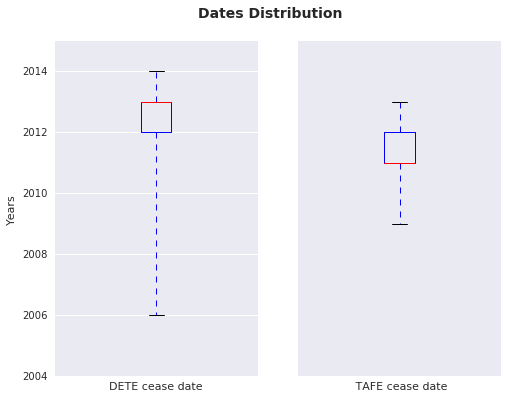

In [23]:
# dropping na through the needed columns
tafe_resignations = tafe_resignations.dropna(subset = ['cease_date'])
dete_resignations = dete_resignations.dropna(subset = ['cease_date','dete_start_date'])
dete_resignations['cease_date'].value_counts(dropna=False)

# exploring distribution of the dates using boxplot
plt.figure(figsize=(8, 6))
plt.figsize = (12,12)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
x = [dete_resignations['dete_start_date'].values, dete_resignations['cease_date'].values, 
    tafe_resignations['cease_date'].values]
_ = ax1.boxplot(x[1], whis = 'range')
ax1.set_ylim(2004,2015)
ax1.set_xlabel('DETE cease date')
ax1.set_ylabel('Years')
ax1.set_xticks([])
_ = ax2.boxplot(x[2], whis = 'range')
ax2.set_ylim(2004,2015)
ax2.set_xlabel(' TAFE cease date')
ax2.set_xticks([])
ax2.set_yticks([])
plt.suptitle('Dates Distribution', weight = 'bold', fontsize = 14)
plt.show()

We see that our data sets aren't in the same time range, I suppose, we should achieve the same time interval for truthful analysis. Let's look at unique() values and pick the range.

In [24]:
print(tafe_resignations['cease_date'].unique())
dete_resignations['cease_date'].unique()

[2010. 2009. 2011. 2012. 2013.]


array([2012., 2013., 2010., 2014., 2006.])

So, obviously, we need to exclude 2006 year, as we see above, only one row includes 2006 year of the cease. We don't lose essential data for analysis if we drop this row but build more consistent and related data frames.

In [25]:
test = dete_resignations.loc[dete_resignations['cease_date'] > 2008, 'cease_date'] 

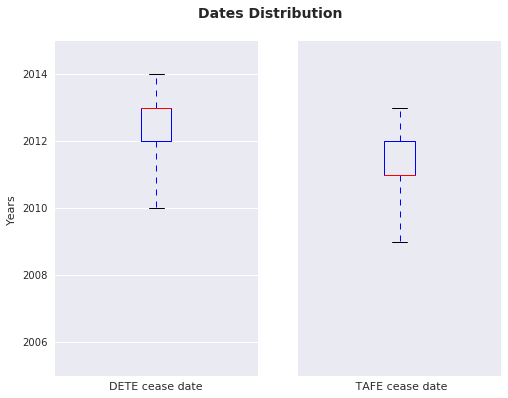

In [26]:
# look at the changes
plt.figure(figsize=(8, 6))
plt.figsize = (12,12)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
x = [dete_resignations['dete_start_date'].values, test.values, 
    tafe_resignations['cease_date'].values]
_ = ax1.boxplot(x[1], whis = 'range')
ax1.set_ylim(2005,2015)
ax1.set_xlabel('DETE cease date')
ax1.set_ylabel('Years')
ax1.set_xticks([])
_ = ax2.boxplot(x[2], whis = 'range')
ax2.set_ylim(2005,2015)
ax2.set_xlabel(' TAFE cease date')
ax2.set_xticks([])
ax2.set_yticks([])
plt.suptitle('Dates Distribution', weight = 'bold', fontsize = 14)
plt.grid(False)
plt.show()

Now it looks better and our datasets are in the same time interval. Next, apply this to the dataset. 

In [27]:
dete_resignations = dete_resignations[dete_resignations['cease_date'] > 2008]
dete_resignations['cease_date'].unique()

array([2012., 2013., 2010., 2014.])

###  The years of service

The length of time an employee spent in a workplace is better to represent as their years of service. 
You may have noticed that the `tafe_resignations` data frame already contains a "service" column, which we renamed to `institute_service`. To analyze both surveys together, we'll have to create a corresponding `institute_service`column in `dete_resignations`.

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index()

0.0     19
1.0     23
2.0     16
3.0     21
4.0     17
5.0     26
6.0     17
7.0     13
8.0      8
9.0     14
10.0     8
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     6
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     3
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     3
49.0     1
Name: institute_service, dtype: int64

Okay, on the rapid sight, everything looks fine.

By the way, we could set and answer one more question:

* In which range of the years of service falls most of resignings?

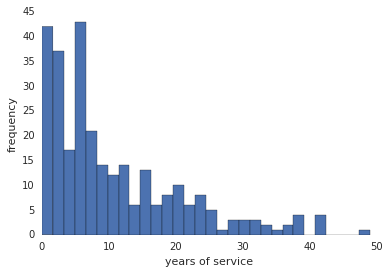

In [29]:
# creating histogram to answer this question
fig, ax = plt.subplots()
plt.hist(dete_resignations['institute_service'], bins = 30)
plt.grid(False)
plt.box(False)
plt.xlabel('years of service')
plt.ylabel('frequency')
plt.show()

___
From this histogram we can notice that the years of service of the most people who resigned falls on the [0 - 10] range and rapidly decreasing over the rest of the years. It looks like exponential distribution in a rough approximation.

### Separating dessatisfied employees

Next, we'll identify any employees who resigned because they were dissatisfied. We will use some columns to identify employees as 'dissatisfied'.

Then we will create the new column indicated employees as dissatisfied.

In [30]:
# tafe_resignations:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False))
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                                         297
Contributing Factors. Dissatisfaction      56
NaN                                        30
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      288
Job Dissatisfaction     65
NaN                     30
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will use the next approach:

1) Convert the values in the columns indicated dissastifacation to `True`, `False`, or `NaN`

2) If any of the columns contain a `True` value, we'll add a `True` value to a new column named dissatisfied, return `False` if none of the elements in the selected columns is `True`, return `NaN` if the value is `NaN`

In [31]:
# function to convert values either True or False, or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
# applying function on each value of the selected columns     
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [32]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].head(10)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


___
The following columns could be used to identify job dissatisfaction from `dete_resignations` dataframe:

In [33]:
diss_cols = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

dete_resignations[diss_cols].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


These values are already bool type, so we don't need to convert them.

Below is creating new columns indicated dissatisfaction, using the `.any()` method. If any `True`, return True, else: `False`. If all of the values np.nan - return `NaN`

In [34]:
dete_resignations['dissatisfied'] = dete_resignations[diss_cols].any(axis = 1, skipna = False)
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)

In [35]:
# setting new variabls for data frames for convinience, printing shapes of them
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()
shape_dete = dete_resignations_up.shape
shape_tafe = tafe_resignations_up.shape
print('dete_resignations_up: cols:{}\nrows={}\ntafe_resignations_up: cols = {}\nrows={}'.format(shape_dete[1],shape_dete[0],shape_tafe[1],shape_tafe[0]) )

dete_resignations_up: cols:38
rows=286
tafe_resignations_up: cols = 24
rows=383


### Combining data frames

Now, it's time to combine our dataframes! Our end goal is to aggregate the data according to the `institute_service` column

In [36]:
# any(dete_resignations_up['id'].values == tafe_resignations_up['id'].sample(287).values)
pd.merge(left = dete_resignations_up, right = tafe_resignations_up, how = 'inner', on = 'id')

,id,separationtype_x,cease_date_x,dete_start_date,role_start_date,position_x,classification,region,business_unit,employment_status_x,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender_y,age_y,employment_status_y,position_y,institute_service_y,role_service,dissatisfied_y


I've checked whether there are the same ID or not
All ID of the both dataframes are different, so let's unite dataframes using `.concat` method to get combined dataframe not separating the same named columns of the different dataframes (this would have happened like this if we used `pd.merge` with 'outher' parametr)

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [37]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# combining data with .concat() method
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True, axis = 0)
print('combined columns:{}\nnum_rows = {}'.format('gov',combined.shape[0]))
combined.head()

combined columns:gov
num_rows = 669


,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


In [38]:
combined.isnull().sum()

Contributing Factors. Career Move - Private Sector     316
Contributing Factors. Career Move - Public Sector      316
Contributing Factors. Career Move - Self-employment    316
Contributing Factors. Dissatisfaction                  316
Contributing Factors. Ill Health                       316
Contributing Factors. Interpersonal Conflict           316
Contributing Factors. Job Dissatisfaction              316
Contributing Factors. Maternity/Family                 316
Contributing Factors. NONE                             334
Contributing Factors. Other                            316
Contributing Factors. Study                            316
Contributing Factors. Travel                           316
Institute                                              286
WorkArea                                               286
aboriginal                                             661
age                                                     56
business_unit                                          6

We will drop any columns with less than 500 non null values. We don't need them anymore for further analysis.

In [39]:
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [40]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


### Treating the institute_service column

Finally, we've got dataframe 670x10 with usefull columns for answering our main questions of this project.

First, though, we'll have to clean up the `institute_service`column. As we see below it currently contains values in a couple different forms:

In [41]:
combined_updated['institute_service'].value_counts()

Less than 1 year      86
3-4                   73
1-2                   69
5-6                   37
7-10                  26
11-20                 26
5.0                   26
1.0                   23
3.0                   21
0.0                   19
4.0                   17
6.0                   17
2.0                   16
9.0                   14
7.0                   13
More than 20 years    12
10.0                   8
8.0                    8
13.0                   8
20.0                   7
15.0                   7
22.0                   6
16.0                   6
17.0                   6
12.0                   6
14.0                   6
18.0                   5
23.0                   4
11.0                   4
24.0                   4
42.0                   3
39.0                   3
19.0                   3
25.0                   3
32.0                   3
21.0                   3
28.0                   2
36.0                   2
30.0                   2
26.0                   2


To analyze the data, we'll convert these numbers into categories.  

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [42]:
# test - it's auxiliary dataframe to manipulate 
test = combined_updated.copy()
# replace less than 1 year with 0 - 1 (this is needed for function 'map_cat' work well)
test['institute_service'] = test['institute_service'].astype('str').str.replace('Less than 1 year', '0 - 1')
# extract all the years and convert it to float
test['institute_service'] = test['institute_service'].str.extract(r'(\d+)', expand = False).astype('float')

In [43]:
test['institute_service'].value_counts(dropna = False)

 0.0     105
 3.0      94
 1.0      92
 5.0      63
NaN       54
 7.0      39
 11.0     30
 20.0     19
 6.0      17
 4.0      17
 2.0      16
 9.0      14
 8.0       8
 10.0      8
 13.0      8
 15.0      7
 12.0      6
 14.0      6
 17.0      6
 16.0      6
 22.0      6
 18.0      5
 24.0      4
 23.0      4
 39.0      3
 21.0      3
 19.0      3
 25.0      3
 42.0      3
 32.0      3
 30.0      2
 26.0      2
 28.0      2
 36.0      2
 41.0      1
 49.0      1
 27.0      1
 35.0      1
 29.0      1
 38.0      1
 33.0      1
 34.0      1
 31.0      1
Name: institute_service, dtype: int64

In [44]:
# function to convert values to the categories depending on their meaning
def map_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [45]:
categ = test.loc[:,'institute_service'].copy()
categ = categ.apply(map_cat) # applying function on each element
combined_updated['service_cat'] = categ # creating new column in combined_updated
                                        # dataframe
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            213
Experienced    191
Veteran        142
Established     69
Name: service_cat, dtype: int64

We've got a column with categorical values, this is what we wanted to get.

Now, let's finally do our first piece of analysis! 

## Analysis of the data

### Years of the service vs dissatisfaction

First, drop the NaN values, because we don't know how to replace them, any unreasonable changes will affect the truth of the analysis, because of that we drop them

In [46]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    402
True     237
NaN       30
Name: dissatisfied, dtype: int64

In [47]:
combined_updated = combined_updated.dropna(subset=['dissatisfied'])

In [48]:
# using 'np.mean' lead to exeption, so I've done it manually.
sum_cut = pd.pivot_table(data = combined_updated, index ='service_cat', values='dissatisfied',aggfunc = np.sum)
count_cut = pd.pivot_table(data = combined_updated, index ='service_cat', values='dissatisfied',aggfunc = 'count')
percentage_cut = round((sum_cut / count_cut)*100, 1)

In [49]:
percentage_cut

,dissatisfied
service_cat,
Established,49.3
Experienced,33.9
New,29.7
Veteran,48.6


For the porpuses of the analysis, we will use visualization to easily understand and answer the question.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



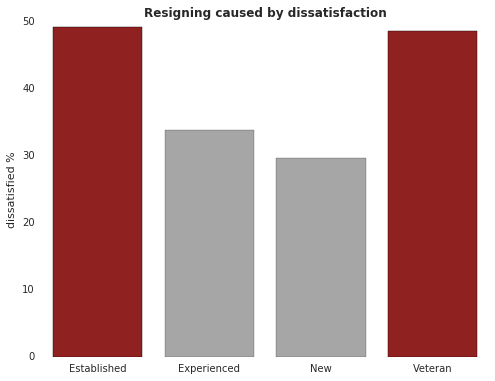

In [50]:
sns.set_style('white')
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = percentage_cut.index, y = 'dissatisfied', data = percentage_cut, color = 'grey', alpha = 0.7)
plt.bar(-0.4, percentage_cut['dissatisfied'][0], color = 'darkred', alpha = 0.8)
plt.bar(2.6, percentage_cut['dissatisfied'][3], color = 'darkred', alpha = 0.8)
ax.set_xlabel('')
ax.set_ylabel('dissatisfied %')
ax.set_title('Resigning caused by dissatisfaction', weight = 'bold')
sns.despine(bottom = True, left = True)
plt.show()

Previously, we saw that most people who resigned are new employees, but looking at the percentage of people who resigned because of some dissatisfaction we see that new employees have the smallest percentage. Half of the people in the Veteran and Established service category resigned due to some kind of dissatisfaction. I assume it's because of the inevitables changes that come from time to time, maybe they got tired of the current situation in workplaces and decided to resign.

Nevertheless, we explored and build visualization describing the situation with the satisfaction of a job in each service category.

### Age influence on the dissatisfaction

Now, let's move on and answer the next question about how age impact on the satisfaction of a job.

In [51]:
combined_updated['age'].value_counts(dropna = False)

51-55            79
NaN              47
41  45           46
41-45            43
46  50           41
36-40            37
46-50            36
26  30           35
31  35           35
21  25           34
36  40           34
26-30            33
31-35            30
56 or older      29
21-25            26
56-60            24
61 or older      20
20 or younger    10
Name: age, dtype: int64

We will split up the `age` column just like we did with service category. We distinguish following categories:

* 20 or younger
* 20 - 25
* 25 - 30
* 30 - 40
* 40 - 50
* older than 50

In [52]:
# extract dates using regex
df = combined_updated.copy()
df['age'] = df['age'].str.extract(r'(\d+)', expand = False).astype('float')

In [53]:
# function to set categories
def map_cat2(val):
    if pd.isnull(val):
        return np.nan
    elif val <= 20:
        return '20 or younger'
    elif 20 < val <= 25:
        return '20 - 25'
    elif 25 < val <= 30:
        return '25 - 30'
    elif 30 < val <= 40:
        return '30 - 40'
    elif 40 < val <= 50:
        return '40 - 50'
    else:
        return 'older than 50'

In [54]:
# applying function on the column
combined_updated['age'] = df['age'].apply(map_cat2)

In [55]:
# do the same like with service to get percentage of dissatisfied people
# in different age ranges
sum_age = pd.pivot_table(data = combined_updated, index ='age', values='dissatisfied',aggfunc = np.sum)
count_age = pd.pivot_table(data = combined_updated, index ='age', values='dissatisfied',aggfunc = 'count')
percentage_age = round((sum_age / count_age)*100, 1)

In [56]:
# use CategoricalDtype to set categories and sort in needed order
from pandas.api.types import CategoricalDtype
categ = ['20 or younger',
'20 - 25',
'25 - 30',
'30 - 40',
'40 - 50',
'older than 50']
cat_type = CategoricalDtype(categories = categ,
                            ordered=True)
percentage_age = percentage_age.reset_index()
percentage_age['age'] = percentage_age['age'].astype(cat_type)
percentage_age = percentage_age.sort_values('age')

In [57]:
percentage_age

,age,dissatisfied
1,20 or younger,20.0
0,20 - 25,30.0
2,25 - 30,41.2
3,30 - 40,36.0
4,40 - 50,39.2
5,older than 50,40.8


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



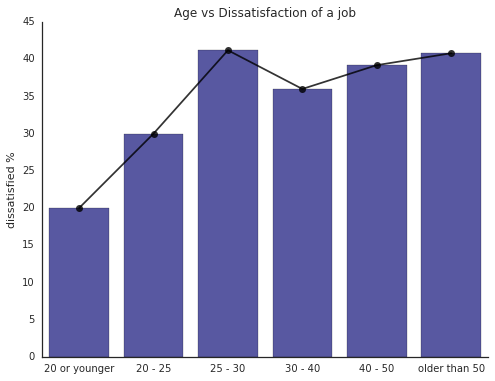

In [58]:
# creating visualization to analize 
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = 'age', y = 'dissatisfied', data = percentage_age, color = 'darkblue', alpha = 0.7)
plt.plot(percentage_age['dissatisfied'].values, color = 'black', marker='o', alpha = 0.8)
sns.despine()
plt.xlabel('')
plt.ylabel('dissatisfied %')
plt.title('Age vs Dissatisfaction of a job')

From this graphic we see a tendency, that dissatisfaction is increasing with age. After 30 years old the percentage decreases a little bit (on 5%) but then increases again. The maximum level of dissatisfaction falls on the 25-30 range. I suppose, that in this period of life, people want to develop a career quickly, set their lives before settling families and because of that more seriously pay attention to conditions of work. Whereas for the young generation, this is something new, they get a new experience  and they haven't got tired yet from their job.

### DETE vs TAFE

___
Let's now answer one more interesting question about these datasets. 

* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

We will modify a table that we used to analyze the difference in dissatisfaction between years of service. We take into account survey institutes, build the pivot table, then melt the data into 'tidy' appearance and create a graphic according to the institutions. This is an approach to how we can analyze this difference.

In [59]:
# creating pivot table taking into account `institute` column
sum_cut2 = pd.pivot_table(data = combined_updated, index ='service_cat', values='dissatisfied', columns = 'institute', aggfunc = np.sum)
count_cut2 = pd.pivot_table(data = combined_updated, index ='service_cat', values='dissatisfied', columns = 'institute', aggfunc = 'count')
percentage_cut2 = round((sum_cut2 / count_cut2)*100, 1)

In [60]:
percentage_cut2 = percentage_cut2.reset_index()
percentage_cut2

institute,service_cat,DETE,TAFE
0,Established,58.1,33.3
1,Experienced,44.4,25.5
2,New,37.9,26.4
3,Veteran,56.7,26.3


In [61]:
# representing data in tidy way, melting data
percentage_cut2 = pd.melt(percentage_cut2, id_vars='service_cat', value_vars=['DETE','TAFE'])

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



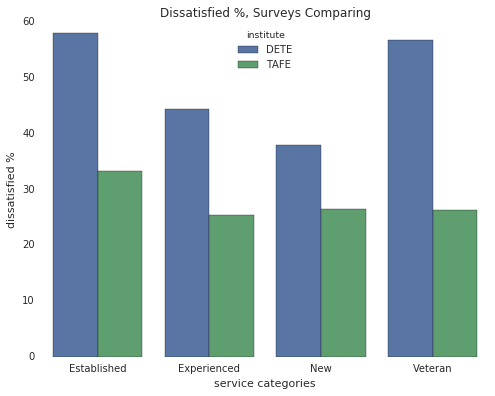

In [62]:
# creating graphic
plt.subplots(figsize = (8,6))
sns.barplot(x = 'service_cat', y = 'value', hue = 'institute', data = percentage_cut2)
sns.despine(bottom = True, left = True)
plt.ylabel('dissatisfied %')
plt.xlabel('service categories')
plt.title('Dissatisfied %, Surveys Comparing')

Now, we see that the most number of people who resigned due to some kind of dissatisfaction are from DETE survey. Each category has this tendency. 

# Conclusion

In this project, we experienced that in order to extract any insights from our data, we had to perform many data cleaning tasks and solved a lot of issues on how to deal with data. We explored two data sets of the surveys from different institutions and managed to find answers to the interesting question set for the project. We found out how the length of the service influence the dissatisfaction of the job, how on this impact ages of the employees, what about overall resigning according to the length of the service and where people were more dissatisfied, from DETE survey or TAFE survey. Also, we created infographics for a better understanding of the data, because without visualization it would have been much harder to understand insights of the data. 

We found out, that half of veterans and established workers resigning due to dissatisfaction with the job conditions. Also, young people are less noticed that they aren't satisfied with their job than the older workers (30 and more years old). The peak of dissatisfaction falls on the 25-30 age range when people have a lot of ambitions to develop.